In [1]:
!ls

CONTRIBUTING.md     Untitled.ipynb      im.db.zip           movie_data_erd.jpeg
LICENSE.md          awesome.gif         imdb                student.ipynb
README.md           im.db               initial_eda.ipynb   zippedData


In [2]:
!ls zippedData

bom.movie_gross.csv.gz  rt.movie_info.tsv.gz    tmdb.movies.csv.gz
im.db.zip               rt.reviews.tsv.gz       tn.movie_budgets.csv.gz


In [3]:
import pandas as pd
import sqlite3

In [4]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
bom_df.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(10)

studio
BV         1.841903e+10
Uni.       1.290239e+10
WB         1.216805e+10
Fox        1.094950e+10
Sony       8.459683e+09
Par.       7.685871e+09
LGF        4.118963e+09
WB (NL)    3.995700e+09
LG/S       2.078200e+09
P/DW       1.682900e+09
Name: domestic_gross, dtype: float64

In [6]:
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('imdb')

In [7]:
!ls

CONTRIBUTING.md     Untitled.ipynb      im.db.zip           movie_data_erd.jpeg
LICENSE.md          awesome.gif         imdb                student.ipynb
README.md           im.db               initial_eda.ipynb   zippedData


In [8]:
!ls imdb

im.db


In [9]:
conn = sqlite3.connect('imdb/im.db')

In [10]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type = 'table'", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [21]:
imdb_df = pd.read_sql("""
SELECT
    movie_id,
    primary_title,
    original_title,
    start_year,
    runtime_minutes,
    genres
FROM movie_basics
""", conn)

In [22]:
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [107]:
tm_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [108]:
tm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [109]:
tm_df['production_budget'] = tm_df['production_budget'].str.replace('$','').str.replace(',','').astype(int)
tm_df['domestic_gross'] = tm_df['domestic_gross'].str.replace('$','').str.replace(',','').astype(int)
tm_df['worldwide_gross'] = tm_df['worldwide_gross'].str.replace('$','').str.replace(',','').astype(int)


In [111]:
tm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   roi                5782 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 316.3+ KB


In [112]:
tm_df['roi'] = tm_df['worldwide_gross'] / tm_df['production_budget'] 

In [180]:
top_roi = tm_df.query('roi > 0').sort_values('roi', ascending=False).reset_index(drop=True)
top_roi

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
0,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,1800.000000
1,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,498.750000
2,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,431.517853
3,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,416.564740
4,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,413.833333
...,...,...,...,...,...,...,...
5410,36,"Nov 21, 2014",Food Chains,913000,0,176,0.000193
5411,53,"Aug 24, 1997",The Grimm Brothers' Snow White,26000000,5000,5000,0.000192
5412,19,"May 8, 2015",Skin Trade,9000000,1242,1242,0.000138
5413,82,"May 21, 2010",Perrierâs Bounty,6600000,828,828,0.000125


In [174]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

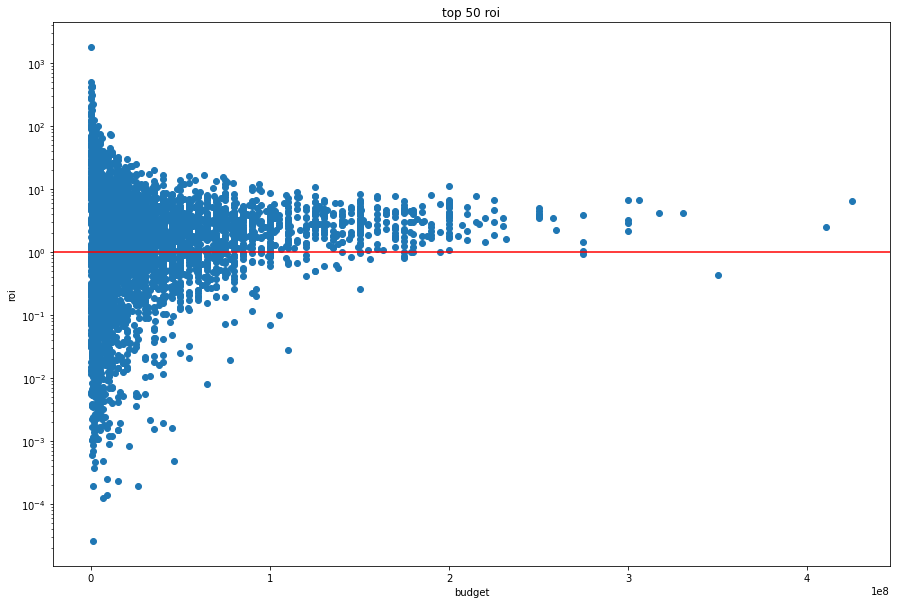

In [181]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('top 50 roi')
ax.set_ylabel('roi')
ax.set_xlabel('budget')
ax.set_yscale('log')
ax.axhline(y=1, color='red')
ax.scatter(top_roi.production_budget, top_roi.roi)
plt.show()

In [196]:
top_roi.query('production_budget >= 1e8 and roi < 1').sort_values('roi', ascending = True)[:40]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
5172,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,0.028182
5034,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000,4411102,7094995,0.070950
4965,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,0.098712
4658,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,0.263665
4439,1,"Dec 17, 2010",How Do You Know?,120000000,30212620,49628177,0.413568
4421,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,0.427892
4334,81,"Jan 13, 2017",Monster Trucks,125000000,33370166,61642798,0.493142
4333,82,"Aug 27, 1999",The 13th Warrior,125000000,32698899,61698899,0.493591
4234,21,"Jul 29, 2005",Stealth,138000000,32116746,76416746,0.553745
4177,3,"Feb 18, 2005",Son of the Mask,100000000,17018422,59918422,0.599184


In [213]:
pd.read_sql("""
SELECT *
FROM movie_basics
ORDER BY movie_id DESC
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary
1,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
2,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
3,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
4,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
...,...,...,...,...,...,...
146139,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
146140,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
146141,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
146142,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [258]:
title_df = pd.read_csv('zippedData/title.basics.tsv.gz', delimiter='\t', error_bad_lines=False)

/Users/michaelroth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [259]:
title_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [260]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950519 entries, 0 to 8950518
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 614.6+ MB


In [309]:
title_df.startYear = title_df.startYear.apply(lambda x: np.nan if x == '\\N' else int(x))

In [310]:
title_df.dropna(inplace=True)

In [311]:
title_df.startYear.isna().sum()

0

In [337]:
new_titles_df = title_df.query('startYear > 1980 and startYear < 2022 and titleType == "movie" and isAdult == 0')

In [338]:
new_titles_df.startYear.value_counts()

2017    18217
2018    18208
2016    17705
2019    17645
2021    16921
2015    16554
2014    15937
2013    14871
2020    14814
2012    14180
2011    13182
2010    12130
2009    11210
2008     9833
2007     8497
2006     7832
2005     7379
2004     6427
2003     5882
2002     5669
2001     5436
2000     5081
1999     4868
1998     4704
1997     4498
1990     4355
1996     4249
1991     4234
1988     4230
1992     4180
1989     4174
1995     4169
1987     4095
1994     4013
1993     4006
1986     3991
1985     3979
1984     3967
1983     3842
1982     3790
1981     3731
Name: startYear, dtype: int64

In [340]:
new_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342685 entries, 11636 to 8950469
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          342685 non-null  object
 1   titleType       342685 non-null  object
 2   primaryTitle    342685 non-null  object
 3   originalTitle   342685 non-null  object
 4   isAdult         342685 non-null  object
 5   startYear       342685 non-null  int64 
 6   endYear         342685 non-null  object
 7   runtimeMinutes  342685 non-null  object
 8   genres          342685 non-null  object
dtypes: int64(1), object(8)
memory usage: 26.1+ MB


In [344]:
new_titles_df.query('primaryTitle == "Goodfellas"')

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
97476,tt0099685,movie,Goodfellas,Goodfellas,0,1990,\N,145,"Biography,Crime,Drama"
